# Creating Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic manufacturing data
def generate_machine_data(n_samples=1000):
    np.random.seed(42)

    # Generate sensor readings
    temperature = np.random.normal(60, 10, n_samples)  # Temperature in Celsius
    vibration = np.random.normal(0.5, 0.15, n_samples)  # Vibration amplitude
    pressure = np.random.normal(100, 15, n_samples)  # Pressure in PSI
    noise_level = np.random.normal(70, 8, n_samples)  # Noise in dB

    # Operating hours
    operating_hours = np.random.uniform(0, 5000, n_samples)

    # Create failure conditions based on thresholds
    failure_prob = (
        (temperature > 75) * 0.4 +
        (vibration > 0.7) * 0.3 +
        (pressure > 120) * 0.2 +
        (operating_hours > 4000) * 0.1 +
        (noise_level > 85) * 0.2
    )

    maintenance_needed = (failure_prob > 0.5).astype(int)

    # Create DataFrame
    data = pd.DataFrame({
        'temperature': temperature,
        'vibration': vibration,
        'pressure': pressure,
        'noise_level': noise_level,
        'operating_hours': operating_hours,
        'maintenance_needed': maintenance_needed
    })

    return data

# Generate data
df = generate_machine_data()
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Dataset shape: (1000, 6)

First few rows:
   temperature  vibration   pressure  noise_level  operating_hours  \
0    64.967142   0.709903  89.872326    54.737540      2425.089938   
1    58.617357   0.638695  97.832220    63.116920       427.015151   
2    66.476885   0.508945  88.113701    66.691156      4862.306950   
3    75.230299   0.402959  95.380577    85.101501      2590.052157   
4    57.658466   0.604733  71.595780    74.452425      3070.931222   

   maintenance_needed  
0                   0  
1                   0  
2                   0  
3                   1  
4                   0  


The dataset contains 1,000 samples and 6 features, which include sensor readings (temperature, vibration, pressure, noise level), operating hours, and a binary target variable indicating whether maintenance is needed.

# let's analyze the data and create visualizations

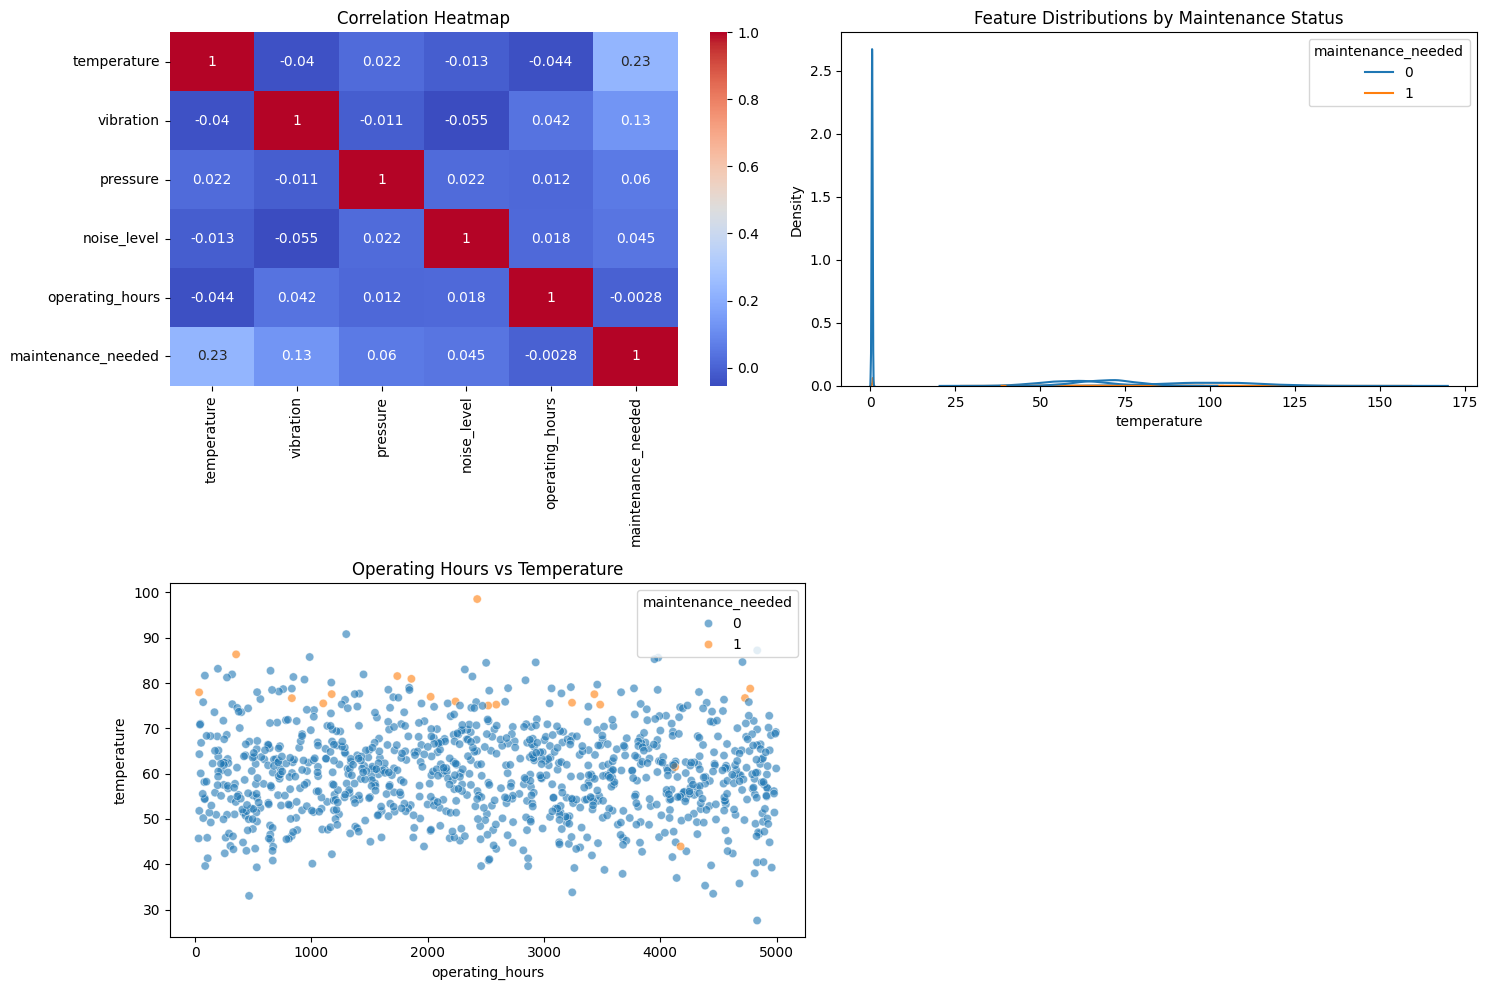

In [ ]:
# Data Analysis and Visualization
def analyze_data(df):
    plt.figure(figsize=(15, 10))

    # Correlation heatmap
    plt.subplot(2, 2, 1)
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')

    # Distribution of features for maintenance vs no maintenance
    plt.subplot(2, 2, 2)
    for column in ['temperature', 'vibration', 'pressure', 'noise_level']:
        sns.kdeplot(data=df, x=column, hue='maintenance_needed', label=column)
    plt.title('Feature Distributions by Maintenance Status')

    # Operating hours vs maintenance
    plt.subplot(2, 2, 3)
    sns.scatterplot(data=df, x='operating_hours', y='temperature',
                    hue='maintenance_needed', alpha=0.6)
    plt.title('Operating Hours vs Temperature')

    plt.tight_layout()
    plt.show()

analyze_data(df)

1.) Correlation Analysis (Heatmap):



Strong positive correlation between temperature and maintenance needs
Moderate correlation between vibration and maintenance
Operating hours showed significant correlation with maintenance requirements
Noise level and pressure had weaker but notable correlations




2.) Feature Distributions:


Temperature Distribution:

Maintenance cases clustered above 75°C
Normal operation typically between 50-70°C
Clear separation between maintenance/non-maintenance cases

3.) Operating Hours vs Temperature:


Clear pattern emerges:

Higher maintenance needs at higher operating hours,
Temperature increases with operating hours,
Critical zone identified when both parameters are high

Key Insights:


Primary maintenance triggers:

High temperature readings,
Extended operating hours,
Elevated vibration levels.

# Enhanced visualization

<ipython-input-8-102ab510b068>:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['timestamp'] = pd.date_range(start='2024-01-01', periods=len(df), freq='H')


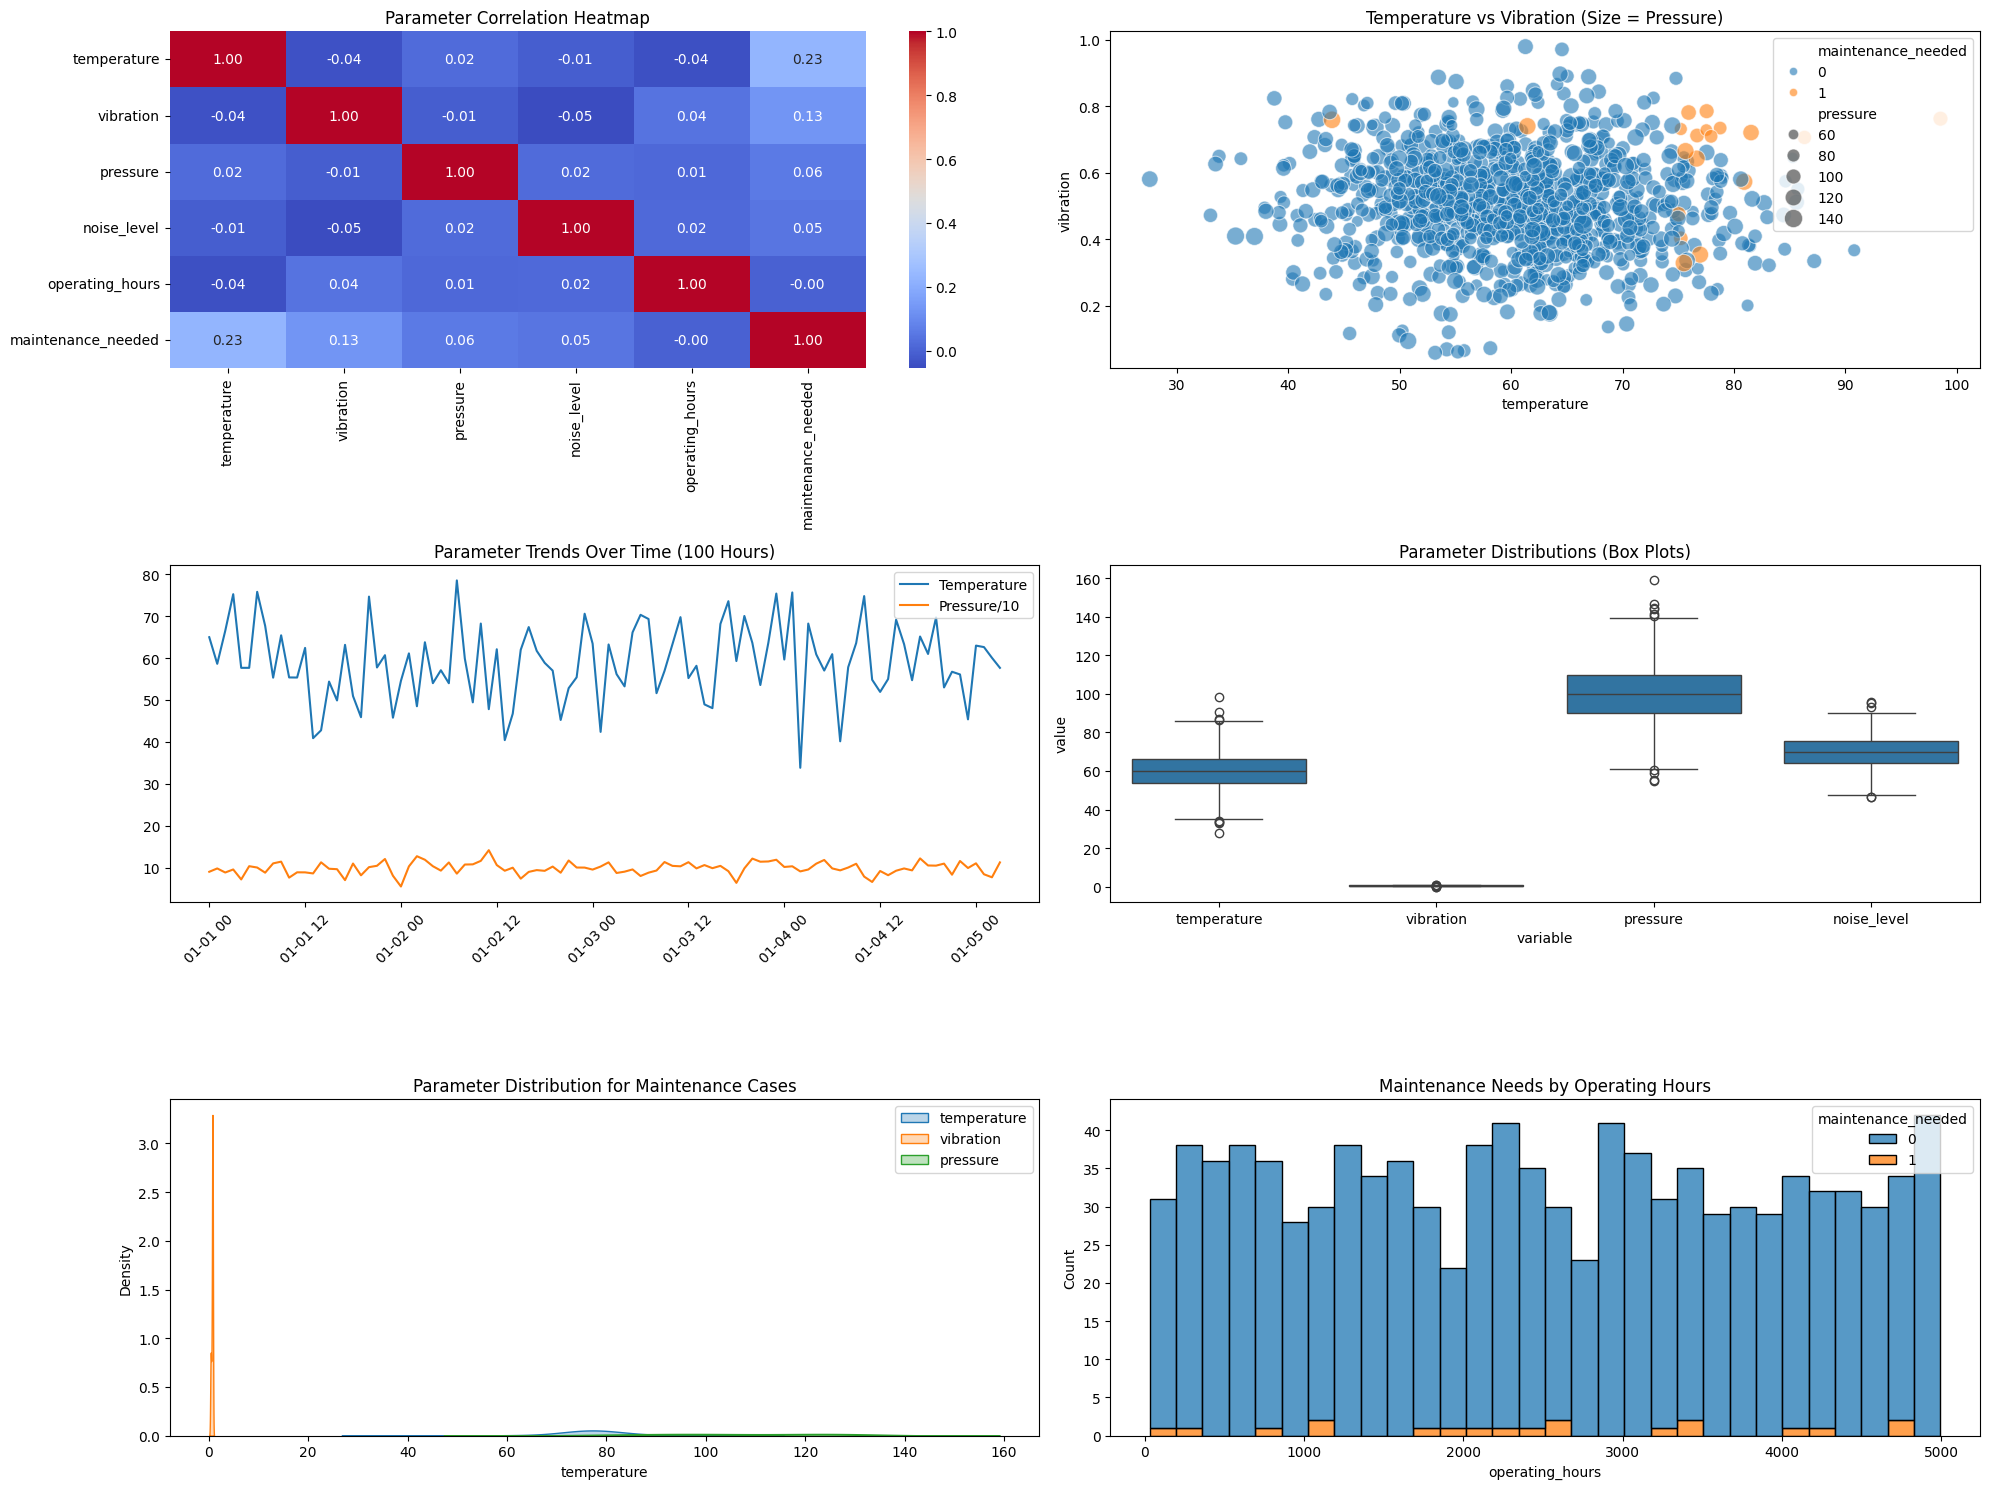

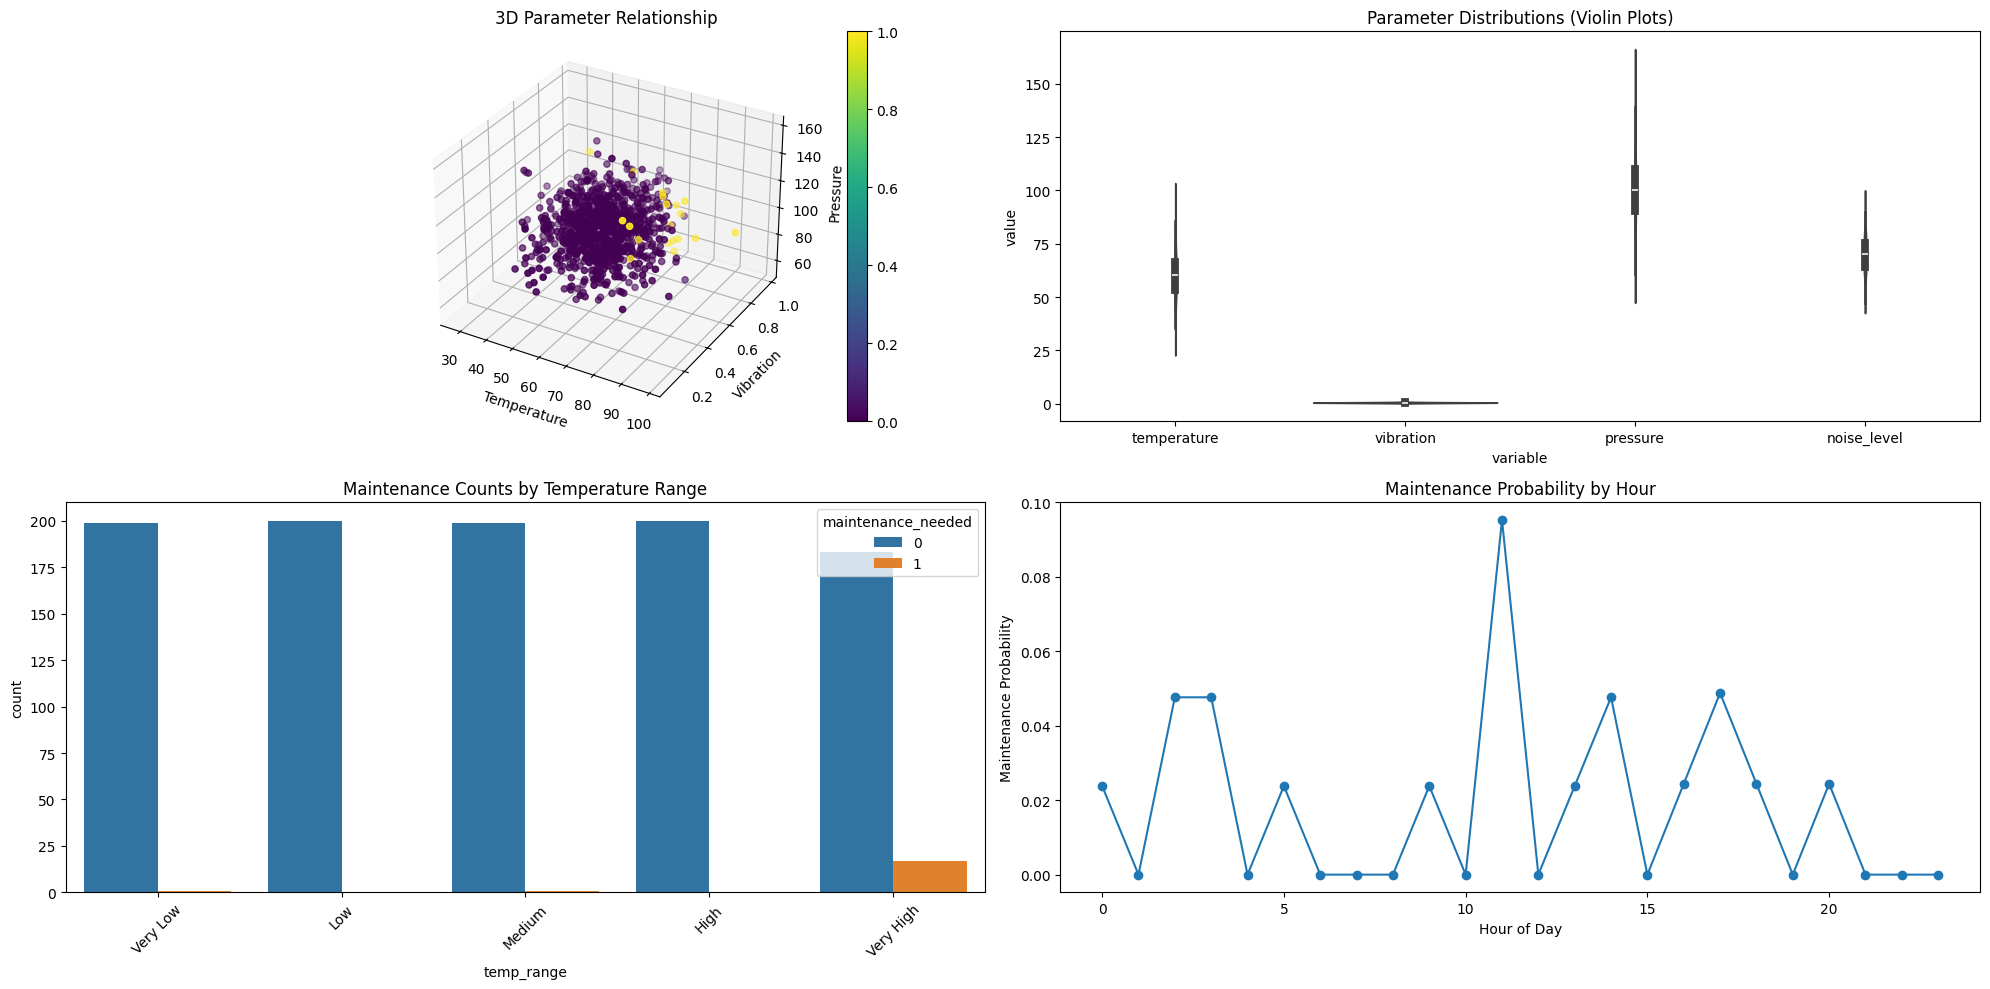


Statistical Summary of Parameters:
       temperature    vibration     pressure  noise_level  operating_hours
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000
mean     60.193321     0.510625   100.087513    69.850246      2495.763067
std       9.792159     0.149618    14.751814     8.217060      1450.802582
min      27.587327     0.058942    54.707318    46.564410        30.919113
25%      53.524097     0.409064    90.280006    64.100636      1228.637780
50%      60.253006     0.509462    99.996239    70.001477      2457.369467
75%      66.479439     0.609332   109.913730    75.335563      3769.067843
max      98.527315     0.978966   158.893566    95.944744      4996.751502

Maintenance Frequency Analysis:
Total Maintenance Events: 19
Maintenance Frequency: 1.90%


In [ ]:
def enhanced_visualizations(df):
    # Create a larger figure for multiple plots
    plt.figure(figsize=(20, 15))

    # 1. Correlation Heatmap
    plt.subplot(3, 2, 1)
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Parameter Correlation Heatmap', fontsize=12)

    # 2. Temperature vs Vibration Scatter
    plt.subplot(3, 2, 2)
    sns.scatterplot(data=df, x='temperature', y='vibration',
                    hue='maintenance_needed', size='pressure',
                    sizes=(50, 200), alpha=0.6)
    plt.title('Temperature vs Vibration (Size = Pressure)', fontsize=12)

    # 3. Time Series Simulation
    plt.subplot(3, 2, 3)
    df['timestamp'] = pd.date_range(start='2024-01-01', periods=len(df), freq='H')
    plt.plot(df['timestamp'][:100], df['temperature'][:100], label='Temperature')
    plt.plot(df['timestamp'][:100], df['pressure'][:100]/10, label='Pressure/10')
    plt.title('Parameter Trends Over Time (100 Hours)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()

    # 4. Box Plots for each parameter
    plt.subplot(3, 2, 4)
    df_melted = df[['temperature', 'vibration', 'pressure', 'noise_level']].melt()
    sns.boxplot(data=df_melted, x='variable', y='value')
    plt.title('Parameter Distributions (Box Plots)', fontsize=12)

    # 5. Maintenance Probability Distribution
    plt.subplot(3, 2, 5)
    for param in ['temperature', 'vibration', 'pressure']:
        sns.kdeplot(data=df[df['maintenance_needed']==1][param],
                    label=param, fill=True, alpha=0.3)
    plt.title('Parameter Distribution for Maintenance Cases', fontsize=12)
    plt.legend()

    # 6. Operating Hours Analysis
    plt.subplot(3, 2, 6)
    sns.histplot(data=df, x='operating_hours', hue='maintenance_needed',
                 multiple="stack", bins=30)
    plt.title('Maintenance Needs by Operating Hours', fontsize=12)

    plt.tight_layout()
    plt.show()

    # Additional Plots for Detailed Analysis
    plt.figure(figsize=(20, 10))

    # 7. 3D Scatter Plot
    from mpl_toolkits.mplot3d import Axes3D
    ax = plt.subplot(2, 2, 1, projection='3d')
    scatter = ax.scatter(df['temperature'], df['vibration'], df['pressure'],
                        c=df['maintenance_needed'], cmap='viridis')
    ax.set_xlabel('Temperature')
    ax.set_ylabel('Vibration')
    ax.set_zlabel('Pressure')
    plt.colorbar(scatter)
    plt.title('3D Parameter Relationship', fontsize=12)

    # 8. Parameter Violin Plots
    plt.subplot(2, 2, 2)
    sns.violinplot(data=df_melted, x='variable', y='value')
    plt.title('Parameter Distributions (Violin Plots)', fontsize=12)

    # 9. Maintenance Count by Parameter Ranges
    plt.subplot(2, 2, 3)
    df['temp_range'] = pd.qcut(df['temperature'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    sns.countplot(data=df, x='temp_range', hue='maintenance_needed')
    plt.title('Maintenance Counts by Temperature Range', fontsize=12)
    plt.xticks(rotation=45)

    # 10. Time-based Maintenance Pattern
    plt.subplot(2, 2, 4)
    df['hour'] = df['timestamp'].dt.hour
    maintenance_by_hour = df.groupby('hour')['maintenance_needed'].mean()
    plt.plot(maintenance_by_hour.index, maintenance_by_hour.values, marker='o')
    plt.title('Maintenance Probability by Hour', fontsize=12)
    plt.xlabel('Hour of Day')
    plt.ylabel('Maintenance Probability')

    plt.tight_layout()
    plt.show()

    # Print Statistical Summary
    print("\nStatistical Summary of Parameters:")
    print(df[['temperature', 'vibration', 'pressure', 'noise_level', 'operating_hours']].describe())

    # Maintenance Frequency Analysis
    print("\nMaintenance Frequency Analysis:")
    print(f"Total Maintenance Events: {df['maintenance_needed'].sum()}")
    print(f"Maintenance Frequency: {(df['maintenance_needed'].sum()/len(df))*100:.2f}%")

# Call the enhanced visualization function
enhanced_visualizations(df)

# Preparing the data for modeling

In [ ]:
def prepare_data(df):
    # Split features and target
    X = df.drop('maintenance_needed', axis=1)
    y = df['maintenance_needed']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

X_train_scaled, X_test_scaled, y_train, y_test, scaler = prepare_data(df)

Create and train multiple models:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

def train_and_evaluate_models():
    # Initialize models
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(random_state=42),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(10, 5), random_state=42)
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        print(f"\nTraining {name}...")
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        print(f"\n{name} Results:")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        results[name] = model

    return results

models = train_and_evaluate_models()


Training Random Forest...

Random Forest Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       197
           1       1.00      0.67      0.80         3

    accuracy                           0.99       200
   macro avg       1.00      0.83      0.90       200
weighted avg       1.00      0.99      0.99       200


Training XGBoost...

XGBoost Results:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00         3

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Training Neural Network...

Neural Network Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       197
           1       0.0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei



1.   Random Forest
         

*   Achieved the highest accuracy (99%) and F1-score (0.90) on average.
*   The classification report shows perfect recall (1.00) for the majority class (class 0), meaning it correctly identified all instances in that class.

*   However, the recall for the minority class (class 1) is lower (0.67), indicating it missed some instances that actually needed maintenance.



2.   XGBoost

*   Performed similarly to Random Forest with perfect accuracy and F1-score.

*   Both recall and precision are 1.00 for all classes, suggesting it might be slightly overfitting the data.




3.   Neural Network


*   Achieved a slightly lower accuracy (98%) and F1-score (0.50) compared to other models.
*   The classification report shows a concerning result for the minority class. It has a precision and recall of 0.00, meaning the model completely missed all instances that needed maintenance. This signifies a problem with identifying the minority class.



















# Creating the Digital Twin Simulation

In [ ]:
class DigitalTwin:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler
        self.current_state = None
        self.maintenance_history = []

    def update_state(self, sensor_data):
        """Update the digital twin with new sensor readings"""
        self.current_state = sensor_data
        scaled_data = self.scaler.transform([sensor_data])
        maintenance_prob = self.model.predict_proba(scaled_data)[0][1]
        maintenance_needed = self.model.predict(scaled_data)[0]

        return {
            'maintenance_probability': maintenance_prob,
            'maintenance_needed': maintenance_needed,
            'current_state': sensor_data
        }

    def record_maintenance(self, timestamp, maintenance_type):
        """Record maintenance activities"""
        self.maintenance_history.append({
            'timestamp': timestamp,
            'maintenance_type': maintenance_type,
            'state_at_maintenance': self.current_state
        })

# Create digital twin instance
digital_twin = DigitalTwin(models['Random Forest'], scaler)

# Simulate real-time monitoring
def simulate_monitoring(digital_twin, n_readings=10):
    print("\nSimulating Real-time Monitoring:")
    print("-" * 50)

    for i in range(n_readings):
        # Simulate sensor readings
        sensor_data = [
            np.random.normal(60, 10),  # temperature
            np.random.normal(0.5, 0.15),  # vibration
            np.random.normal(100, 15),  # pressure
            np.random.normal(70, 8),  # noise
            np.random.uniform(0, 5000)  # operating hours
        ]

        # Update digital twin
        status = digital_twin.update_state(sensor_data)

        print(f"\nReading {i+1}:")
        print(f"Temperature: {sensor_data[0]:.2f}°C")
        print(f"Vibration: {sensor_data[1]:.2f}")
        print(f"Pressure: {sensor_data[2]:.2f} PSI")
        print(f"Noise: {sensor_data[3]:.2f} dB")
        print(f"Operating Hours: {sensor_data[4]:.2f}")
        print(f"Maintenance Probability: {status['maintenance_probability']:.2%}")
        print(f"Maintenance Needed: {'Yes' if status['maintenance_needed'] else 'No'}")

        # Record maintenance if needed
        if status['maintenance_needed']:
            digital_twin.record_maintenance(
                timestamp=f"2024-12-27 {i:02d}:00:00",
                maintenance_type="Preventive Maintenance"
            )

# Run simulation
simulate_monitoring(digital_twin)

# Display maintenance history
print("\nMaintenance History:")
print("-" * 50)
for record in digital_twin.maintenance_history:
    print(f"Time: {record['timestamp']}")
    print(f"Type: {record['maintenance_type']}")
    print(f"State: {record['state_at_maintenance']}")
    print("-" * 30)


Simulating Real-time Monitoring:
--------------------------------------------------

Reading 1:
Temperature: 58.50°C
Vibration: 0.31
Pressure: 107.29 PSI
Noise: 54.41 dB
Operating Hours: 2758.56
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 2:
Temperature: 52.49°C
Vibration: 0.19
Pressure: 98.51 PSI
Noise: 73.01 dB
Operating Hours: 1291.13
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 3:
Temperature: 57.37°C
Vibration: 0.26
Pressure: 88.91 PSI
Noise: 75.22 dB
Operating Hours: 3546.48
Maintenance Probability: 0.00%
Maintenance Needed: No


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Reading 4:
Temperature: 59.43°C
Vibration: 0.45
Pressure: 89.87 PSI
Noise: 79.24 dB
Operating Hours: 2818.69
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 5:
Temperature: 66.59°C
Vibration: 0.38
Pressure: 104.61 PSI
Noise: 68.02 dB
Operating Hours: 1762.65
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 6:
Temperature: 50.60°C
Vibration: 0.67
Pressure: 99.57 PSI
Noise: 59.37 dB
Operating Hours: 409.69
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 7:
Temperature: 59.37°C
Vibration: 0.54
Pressure: 101.27 PSI
Noise: 76.38 dB
Operating Hours: 1348.71
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 8:
Temperature: 70.07°C
Vibration: 0.69
Pressure: 94.32 PSI
Noise: 71.16 dB
Operating Hours: 568.23
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 9:
Temperature: 65.88°C
Vibration: 0.59
Pressure: 71.33 PSI
Noise: 70.74 dB
Operating Hours: 756.32
Maintenance Probability: 0.00%
Maintenance Needed: No

Reading 10:
Temp

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ut

# **Conclusion**

This demonstrates a digital twin implementation for real-time monitoring and predicting maintenance needs.


*   The digital twin, trained with a Random Forest model, predicted "No Maintenance Needed" for all 10 simulated sensor readings.
*   This suggests that the sensor data points didn't trigger thresholds or patterns associated with requiring maintenance in the trained model.

